# Actividad

- **Nombre**: Juan Pablo Treviño Lozano
- **Matrícula**: A01197363 

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

presion_df = pd.read_csv('data/presion.csv')
presion_df.head()


,edad,presion,Unnamed: 2
0,56,148,NaN
1,45,120,NaN
2,72,159,NaN
3,36,118,NaN
4,63,146,NaN


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


Text(0.5, 1.0, 'Relación entre edad y presión')

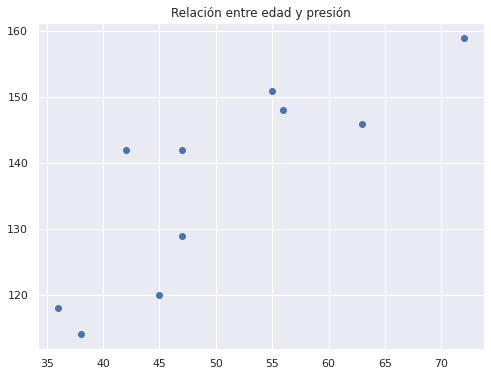

In [18]:
fig = plt.figure(figsize=(8, 6))
x = presion_df['edad']
y = presion_df['presion']
plt.scatter(x, y);
plt.title('Relación entre edad y presión')

3. Genera una regresión lineal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.1483331897665603
Model intercept: 79.36850719269533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0.5, 1.0, 'Relación entre edad y presión')

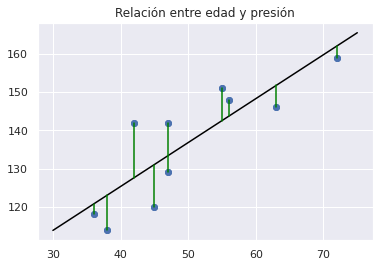

In [17]:
xfit = np.linspace(30, 75, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green")
plt.title('Relación entre edad y presión')

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
def presion(edad):
  return model.coef_[0]*edad + model.intercept_

presion(76)

166.6418296149539

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [ ]:
negocio_df = pd.read_csv('data/AdvmiNegocio.csv')
negocio_df = negocio_df.iloc[:, 1::]
negocio_df.head() 

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


Text(0.5, 1.0, 'Relación inversión en TV y ventas')

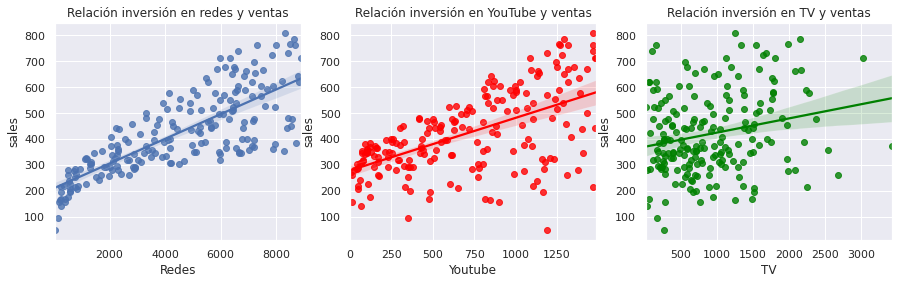

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))

sns.regplot(data=negocio_df, x='Redes',y='sales', ax=axs[0])
axs[0].set_title('Relación inversión en redes y ventas')
sns.regplot(data=negocio_df, x='Youtube',y='sales', ax=axs[1], color='red')
axs[1].set_title('Relación inversión en YouTube y ventas')
sns.regplot(data=negocio_df, x='TV',y='sales', ax=axs[2], color='green')
axs[2].set_title('Relación inversión en TV y ventas')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

Las redes tienen resultados más consistentes, por lo que se puede obtener una estimación más acertada, sin embargo, estas son las que tienen resultados con menor razón de cambio positiva.

La TV tiene los resultados con mayor error, por lo que hay menos certeza de los resultados que se obtendrán.

La regresión lineal de YouTube tienen un error un poco mayor al de las redes, sin embargo, este tiene una mayor razón de cambio positiva, por lo que es una mejor opción para invertir.



4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [ ]:
lm1 = LinearRegression()
lm1.fit(negocio_df[['Redes']], negocio_df['sales'])
print('Redes')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_)
print('Score: ', lm1.score(negocio_df[['Redes']], negocio_df['sales']), '\n')

lm2 = LinearRegression()
lm2.fit(negocio_df[['Youtube']], negocio_df['sales'])
print('Youtube')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(negocio_df[['Youtube']], negocio_df['sales']), '\n')

lm3 = LinearRegression()
lm3.fit(negocio_df[['TV']], negocio_df['sales'])
print('TV')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(negocio_df[['TV']], negocio_df['sales']))

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

Youtube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

Redes tiene el mejor modelo, seguido de YouTube y siendo TV el peor.

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [ ]:

lm4 = LinearRegression()
lm4.fit(negocio_df[['Redes', 'Youtube']], negocio_df['sales'])
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(negocio_df[['Redes', 'Youtube']], negocio_df['sales']), '\n')

lm5 = LinearRegression()
lm5.fit(negocio_df[['Redes','TV']], negocio_df['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(negocio_df[['Redes','TV']], negocio_df['sales']), '\n')

lm6 = LinearRegression()
lm6.fit(negocio_df[['Youtube','TV']], negocio_df['sales'])
print('Youtube y TV')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(negocio_df[['Youtube','TV']], negocio_df['sales']), '\n')

lm7 = LinearRegression()
lm7.fit(negocio_df[['Redes','Youtube','TV']], negocio_df['sales'])
print('Redes, Youtube y TV')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(negocio_df[['Redes','Youtube','TV']], negocio_df['sales']), '\n')

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956 

Redes y TV
beta_0:  173.24843903734896
betas:  [0.04690121 0.04421942]
Score:  0.6458354938293271 

Youtube y TV
beta_0:  275.66761377589694
betas:  [0.19904459 0.00664417]
Score:  0.33270518395032256 

Redes, Youtube y TV
beta_0:  88.16668108378224
betas:  [ 0.04576465  0.18853002 -0.00103749]
Score:  0.8972106381789521 



7.  ¿Cuál modelo es el que nos conviene elegir?

El mejor modelo es el de Redes, YouTube y TV, seguido de Redes y Youtube, ya que tienen el score más grande de todos.